# 1.Create a Spark session

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("Chicago crime analysis").config("spark.driver.meory","40g").getOrCreate()

23/10/24 20:02:55 WARN Utils: Your hostname, Karthiks-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.200.132.210 instead (on interface en0)
23/10/24 20:02:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/24 20:02:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

# 2.Define the schema for loading the Chicago crime dataset

In [4]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType

# Defining the schema
schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Case Number", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("Primary Type", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Location Description", StringType(), True),
    StructField("Arrest", BooleanType(), True),
    StructField("Domestic", BooleanType(), True),
    StructField("Beat", IntegerType(), True),
    StructField("District", IntegerType(), True),
    StructField("Ward", IntegerType(), True),
    StructField("Community Area", IntegerType(), True),
    StructField("FBI Code", StringType(), True),
    StructField("X Coordinate", IntegerType(), True),
    StructField("Y Coordinate", IntegerType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Updated On", StringType(), True),
    StructField("Latitude", DoubleType(), True),
    StructField("Longitude", DoubleType(), True),
    StructField("Location", StringType(), True)
])


# 3.Load the Chicago crime data (you should get more than a million rows).

In [5]:
df = spark.read.csv("Crimes_-_2001_to_Present.csv", schema=schema, header=True)

# Show the DataFrame
df.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|             

In [6]:
#count of the records in the dataframe
df.count()

7918014

In [7]:
#schema of the dataframe
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



# 4.Clean Data

Removing Null Values


In [8]:
from pyspark.sql.functions import col, sum
null_counts = [(col_name, df.filter(col(col_name).isNull()).count()) for col_name in df.columns]

# Filter columns with null values
columns_with_nulls = [(col_name, count) for col_name, count in null_counts if count > 0]

# Show the columns with null values and their counts
for col_name, count in columns_with_nulls:
    print(f"Column '{col_name}' has {count} null values.")

Column 'Location Description' has 11934 null values.
Column 'District' has 47 null values.
Column 'Ward' has 614849 null values.
Column 'Community Area' has 613476 null values.
Column 'X Coordinate' has 90147 null values.
Column 'Y Coordinate' has 90147 null values.
Column 'Latitude' has 90147 null values.
Column 'Longitude' has 90147 null values.
Column 'Location' has 90147 null values.


In [9]:
df = df.na.drop()

# Show the modified 'df' DataFrame
df.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13210088|   JG423627|08/31/2023 12:00:...|023XX W JACKSON BLVD|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|             

Change the date column type 

In [10]:
from pyspark.sql.functions import to_timestamp

# Change 'Date' column data type to timestamp
df = df.withColumn("Date", to_timestamp("Date", "MM/dd/yyyy hh:mm:ss a"))
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [11]:
# Count of records after dropping the null values
df.count()

7213736

In [12]:
df.select('Date')

DataFrame[Date: timestamp]

# 5. Filter the data for last ten years.

In [13]:
df = df.where(col("Year") >= 2013)

from pyspark.sql.functions import min, max

# Find the minimum and maximum values in the 'Date' column
date_min_max = df.select(min("Date").alias("MinDate"), max("Date").alias("MaxDate"))

# Show the results
date_min_max.show()


+-------------------+-------------------+
|            MinDate|            MaxDate|
+-------------------+-------------------+
|2013-01-01 00:00:00|2023-10-15 00:00:00|
+-------------------+-------------------+



# 6. Remove all the records with the following crime types:
'NON-CRIMINAL (SUBJECT SPECIFIED)'<br>
'OTHER OFFENSE'<br>
'STALKING'<br>
'NON - CRIMINAL'<br>
'ARSON'

In [14]:
#All values for the cloumn Primary Type
unique_primary_types = df.select("Primary Type").distinct().rdd.map(lambda row: row[0]).collect()

# Print the list of unique values of the Primary Type column
for primary_type in unique_primary_types:
    print(primary_type)

OFFENSE INVOLVING CHILDREN
CRIMINAL SEXUAL ASSAULT
STALKING
PUBLIC PEACE VIOLATION
OBSCENITY
ARSON
GAMBLING
CRIMINAL TRESPASS
ASSAULT
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
THEFT
BATTERY
ROBBERY
HOMICIDE
HUMAN TRAFFICKING
INTIMIDATION
PROSTITUTION
DECEPTIVE PRACTICE
CONCEALED CARRY LICENSE VIOLATION
SEX OFFENSE
CRIMINAL DAMAGE
NARCOTICS
OTHER OFFENSE
KIDNAPPING
BURGLARY
WEAPONS VIOLATION
INTERFERENCE WITH PUBLIC OFFICER
CRIM SEXUAL ASSAULT
NON-CRIMINAL (SUBJECT SPECIFIED)
NON - CRIMINAL
PUBLIC INDECENCY
NON-CRIMINAL
OTHER NARCOTIC VIOLATION
RITUALISM


In [15]:
excluded_crime_types = [
    'NON-CRIMINAL (SUBJECT SPECIFIED)',
    'OTHER OFFENSE',
    'STALKING',
    'NON - CRIMINAL',
    'ARSON'
]

# Remove records with the specified crime types
df = df.filter(~col("Primary Type").isin(excluded_crime_types))

# Show the resulting DataFrame
#df.show()


#All values for the cloumn Primary Type after deleting
unique_primary_types = df.select("Primary Type").distinct().rdd.map(lambda row: row[0]).collect()

# Print the list of unique values
for primary_type in unique_primary_types:
    print(primary_type)

OFFENSE INVOLVING CHILDREN
CRIMINAL SEXUAL ASSAULT
PUBLIC PEACE VIOLATION
OBSCENITY
GAMBLING
CRIMINAL TRESPASS
ASSAULT
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
THEFT
BATTERY
ROBBERY
HOMICIDE
HUMAN TRAFFICKING
INTIMIDATION
PROSTITUTION
DECEPTIVE PRACTICE
CONCEALED CARRY LICENSE VIOLATION
SEX OFFENSE
CRIMINAL DAMAGE
NARCOTICS
KIDNAPPING
BURGLARY
WEAPONS VIOLATION
INTERFERENCE WITH PUBLIC OFFICER
CRIM SEXUAL ASSAULT
PUBLIC INDECENCY
NON-CRIMINAL
OTHER NARCOTIC VIOLATION
RITUALISM


# 7. Merge the similar crime types.
For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.
<br><br>Here we have grouped similar offeses as a single category, example theft, robbery and burglary are grouped as Property crime etc the mapping has teh details of the megred columns.

In [16]:
from pyspark.sql.functions import when, col

# Define a mapping dictionary for merging similar crime types based on their actions
crime_type_mapping = {
    'OFFENSE INVOLVING CHILDREN': 'OFFENSE INVOLVING CHILDREN',
    'CRIMINAL SEXUAL ASSAULT': 'SEX_CRIMES',
    'PUBLIC PEACE VIOLATION': 'PUBLIC INDECENCY',
    'OBSCENITY': 'SEX_CRIMES',
    'GAMBLING': 'GAMBLING',
    'CRIMINAL TRESPASS': 'CRIMINAL TRESPASS',
    'ASSAULT': 'ASSAULT',
    'LIQUOR LAW VIOLATION': 'LIQUOR LAW VIOLATION',
    'MOTOR VEHICLE THEFT': 'MOTOR VEHICLE THEFT',
    'THEFT': 'PROPERTY CRIME',
    'BATTERY': 'ASSAULT',
    'ROBBERY': 'PROPERTY CRIME',
    'HOMICIDE': 'HOMICIDE',
    'HUMAN TRAFFICKING': 'HUMAN TRAFFICKING',
    'INTIMIDATION': 'INTIMIDATION',
    'PROSTITUTION': 'SEX_CRIMES',
    'DECEPTIVE PRACTICE': 'DECEPTIVE PRACTICE',
    'CONCEALED CARRY LICENSE VIOLATION': 'CONCEALED CARRY LICENSE VIOLATION',
    'SEX OFFENSE': 'SEX_CRIMES',
    'CRIMINAL DAMAGE': 'CRIMINAL DAMAGE',
    'NARCOTICS': 'DRUG OFFENSE',
    'KIDNAPPING': 'KIDNAPPING',
    'BURGLARY': 'PROPERTY CRIME',
    'WEAPONS VIOLATION': 'WEAPONS VIOLATION',
    'INTERFERENCE WITH PUBLIC OFFICER': 'INTERFERENCE WITH PUBLIC OFFICER',
    'CRIM SEXUAL ASSAULT': 'SEX_CRIMES',
    'PUBLIC INDECENCY': 'PUBLIC INDECENCY',
    'NON-CRIMINAL': 'NON-CRIMINAL',
    'OTHER NARCOTIC VIOLATION': 'DRUG OFFENSE',
    'RITUALISM': 'RITUALISM'
}

# Use the 'when' function to update the 'Primary Type' column based on the mapping dictionary
for original_type, merged_type in crime_type_mapping.items():
    df = df.withColumn('Primary Type', when(col('Primary Type') == original_type, merged_type).otherwise(col('Primary Type')))

#All values for the cloumn Primary Type after merging
unique_primary_types = df.select("Primary Type").distinct().rdd.map(lambda row: row[0]).collect()

# Print the list of unique values
for primary_type in unique_primary_types:
    print(primary_type)

OFFENSE INVOLVING CHILDREN
SEX_CRIMES
DRUG OFFENSE
GAMBLING
CRIMINAL TRESPASS
ASSAULT
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
HOMICIDE
PUBLIC INDECENCY
HUMAN TRAFFICKING
INTIMIDATION
DECEPTIVE PRACTICE
CONCEALED CARRY LICENSE VIOLATION
CRIMINAL DAMAGE
PROPERTY CRIME
KIDNAPPING
WEAPONS VIOLATION
INTERFERENCE WITH PUBLIC OFFICER
NON-CRIMINAL
RITUALISM


# Analyze the data and present results:
# 1.Show year-wise trend of the crime for last ten years.


Here we are plotting the crime trend using crime count for the last years data


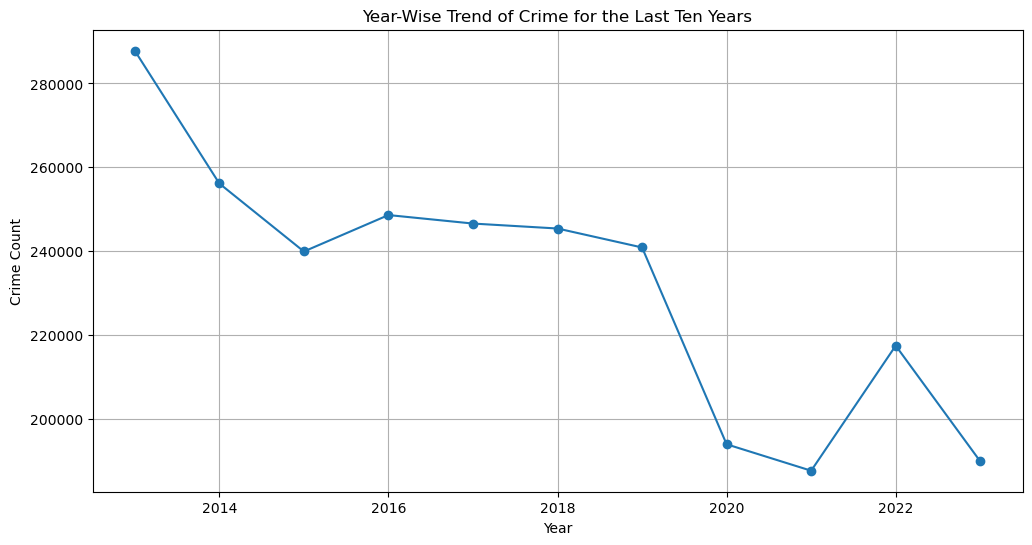

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, hour
import pandas as pd



Crime_trend = df.filter(year("Date") >= 2013).groupBy(year("Date").alias("Year")).count().orderBy("Year")
Crime_trend_pandas = Crime_trend.toPandas()
print("Here we are plotting the crime trend using crime count for the last years data")
plt.figure(figsize=(12, 6))
plt.plot(Crime_trend_pandas["Year"], Crime_trend_pandas["count"], marker='o')
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.title("Year-Wise Trend of Crime for the Last Ten Years")
plt.grid(True)
plt.show()



2.Find out at which hour of the day crime is highest.


The hour of the day with the higest crime


+----+------+
|Hour| count|
+----+------+
|  12|147534|
+----+------+
only showing top 1 row



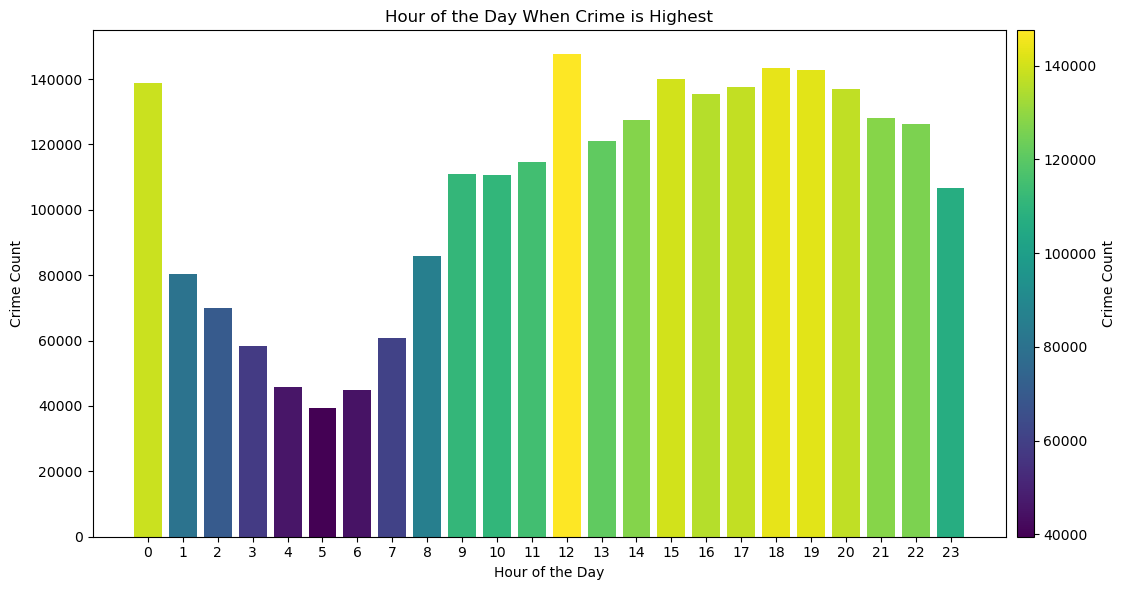

In [19]:
Crime_hourly = df.groupBy(hour("Date").alias("Hour")).count().orderBy("count", ascending=False)
Crime_hourly_pandas = Crime_hourly.toPandas()
print('The hour of the day with the higest crime')
Crime_hourly.show(1) 

# Create a colormap for the bars
colormap = plt.cm.viridis  # You can choose a different colormap

# Normalize the counts to map them to the colormap range
normalize = plt.Normalize(Crime_hourly_pandas['count'].min(), Crime_hourly_pandas['count'].max())
colors = colormap(normalize(Crime_hourly_pandas['count']))

# Create the bar chart with custom colors
plt.figure(figsize=(12, 6))
bars = plt.bar(Crime_hourly_pandas["Hour"], Crime_hourly_pandas["count"], color=colors)
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Count")
plt.title("Hour of the Day When Crime is Highest")
plt.xticks(range(0, 24))

# Add a colorbar to show the mapping of colors to counts
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])  # create a dummy scalar mappable
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.01, aspect=30)
cbar.set_label("Crime Count")

# Display the bar chart
plt.tight_layout()


3.Find top ten crimes and present them as a bar chart.

Top 10 crimes are


+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|      PROPERTY CRIME|844261|
|             ASSAULT|715608|
|     CRIMINAL DAMAGE|301337|
|  DECEPTIVE PRACTICE|167636|
|        DRUG OFFENSE|156451|
| MOTOR VEHICLE THEFT|138863|
|   CRIMINAL TRESPASS| 64232|
|   WEAPONS VIOLATION| 62673|
|          SEX_CRIMES| 35375|
|OFFENSE INVOLVING...| 22490|
+--------------------+------+



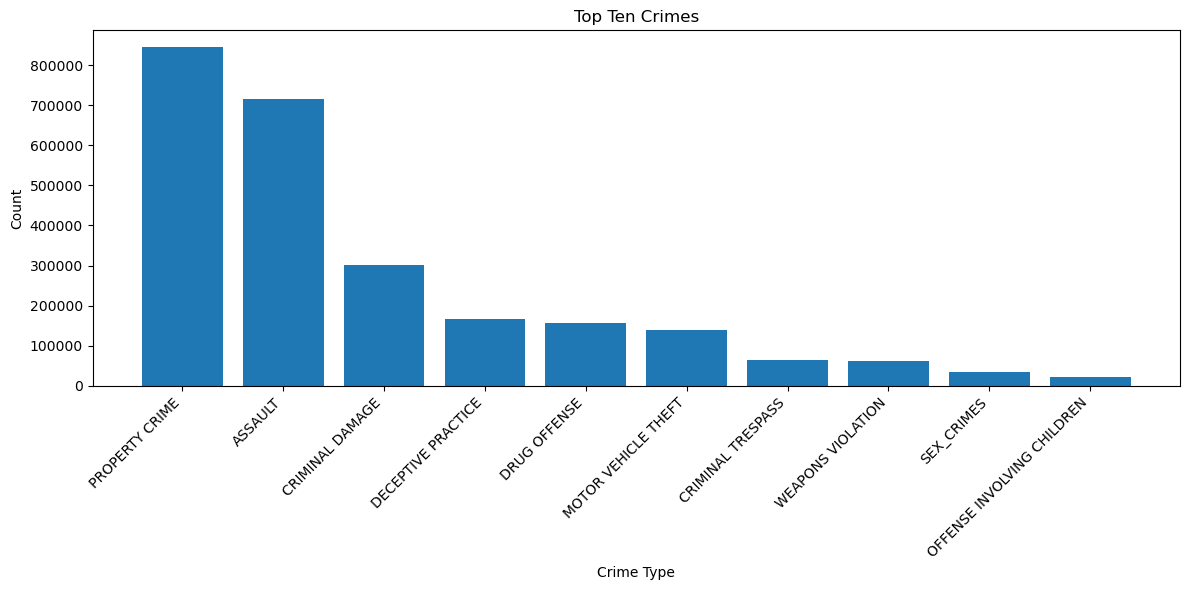

In [20]:
top_ten_crimes = df.groupBy("Primary Type").count().orderBy("count", ascending=False).limit(10)
print('Top 10 crimes are')
top_ten_crimes.show()
top_ten_crimes_pandas = top_ten_crimes.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(top_ten_crimes_pandas["Primary Type"], top_ten_crimes_pandas["count"])
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.title("Top Ten Crimes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


